# Tasks for laboratory assignment 1

In [2]:
# imports section

import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
from datetime import datetime
import csv
import numpy as np
import matplotlib.pyplot as plt

## Extract webpage data given the url

Create a Python script that performs basic web scraping on a page to extract all the information into text and returns it as a string.
String should not contain tags.

In [4]:
def parse_web_page(url: str) -> str:
    """
    Fetch the content of the given web page.

    Args:
        url (str): The URL of the web page to fetch.

    Returns:
        str: The content of the page as a string.

    Raises:
        HTTPError: If the HTTP request returned an unsuccessful status code.
    """
    response = requests.get(url)
    response.raise_for_status() # raises an error
    response_text = BeautifulSoup(response.text).get_text().strip()
    return response_text

print(parse_web_page('https://fmi.chnu.edu.ua/')[:255])
print(parse_web_page('https://en.wikipedia.org/wiki/Web_scraping')[:255])

Головна - Факультет математики та інформатики




















































Перейти до основного вмісту






[email protected]



                58012, Україна, м. Чернівці, вул. Університетська, 28
            


















Web scraping - Wikipedia



























Jump to content







Main menu





Main menu
move to sidebar
hide



		Navigation
	


Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate





		Contribute
	


HelpLearn to ed


## Get data from the API

Create a python script that performs basic request to API endpoint and saves that data to a JSON file `result.json`.

In [5]:
def parse_api(api_url:str) -> None:
    """
    Fetch the data of the given API endpoint and save it to result.json.

    Args:
        api_url (str): The URL of the API endpoint.

    Returns:
        None.

    Raises:
        HTTPError: If the HTTP request returned an unsuccessful status code.
    """
    response = requests.get(api_url)
    response.raise_for_status()
    with open("results/result.json","w") as f:
        json.dump(response.json(),f,indent=6)


parse_api('https://api.github.com/')

## Parse the json file

Parse the `weather.json` file and return weather data for a specific date, that is given as a parameter. Return the data as an array.

In [23]:
def parse_json(date:str) -> list:
    """
    Parse the data from weather.json file and return weather data for a given date.

    Args:
        date (str): The date for which we look up the weather.

    Returns:
        list: a list of weather data for a given date.
    """
    with open("resources/weather.json") as f:
        weather_data = json.load(f)
    for weather in weather_data['daily']:
        if weather.get("date","") == date:
            return list(weather.values())
    return []
    
target_date = '2024-08-19' # previous date was 2024-8-19 - without zero
print(parse_json(target_date))

['2024-08-19', 30.0, 21.0, 5.0, 10.0, 70, 'Light rain']


## Parse the csv file

Parse the `weather.csv` file and return weather data for a specific date, that is given as a parameter. Return the data as an array.

In [43]:
def parse_csv(date:str) -> list:
    """
    Parse the data from weather.csv file and return weather data for a given date.

    Args:
        date (str): The date for which we look up the weather.

    Returns:
        list: a list of weather data for a given date.
    """
    weather_data = pd.read_csv("resources/weather.csv", delimiter=",")
    filtered_data = weather_data[weather_data['CET'] == date] # dataframe if (weather_data['CET'] == date) - True
    if not filtered_data.empty:
        return(filtered_data.values)
    return []
    
target_date = '1997-5-22'
print(parse_csv(target_date))

[['1997-5-22' 25.0 18.0 10.0 11.0 8.0 6.0 88.0 54.0 34.0 1017 1015 1012
  10.0 10.0 10.0 11 3 nan 0.0 3.0 nan 277]]


## Visualize data

Visualize the `weather.csv` data using matplotlib. Choose your own approach to data visualization. Save the results (as `.png`, `.webp` files etc., your choise) in this repository. 

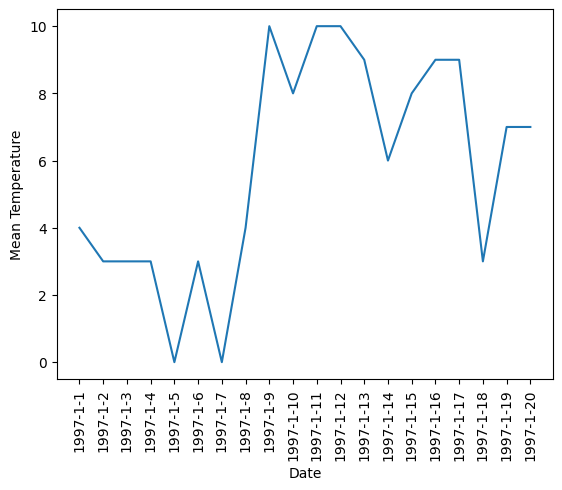

In [7]:
def visualize_data() -> None:
    """
    Parse the data from weather.csv file and visualize it using Matplotlib. Use more then one visualization. 
    Save the results in the repository.

    Args:
        None: None.

    Returns:
        None: None.
    """
    weather_data = pd.read_csv("resources/weather.csv", delimiter=",", nrows=20)
    plt.plot(weather_data['CET'],weather_data['Mean TemperatureC'])
    plt.xlabel("Date")
    plt.xticks(rotation=90)
    plt.ylabel("Mean Temperature")
    plt.savefig("results/temperature.png")
    plt.show()


visualize_data()